## Advisory 
### If you have not yet begun the project 
Please do not use this workspace.  Use the AWS resources provided and the instructions from the [cloud computing lesson](https://classroom.udacity.com/nanodegrees/nd101/parts/b9c4c3c3-b524-427b-8832-9d0748f14a2e/modules/de12f7bf-d980-4998-ab91-0e411184c878/lessons/29df00d8-01c2-4995-92fa-a4afd020be90/concepts/80d2ed46-1bba-413e-891e-610259017251).
### If you have started on this workspace
Please consider downloading your Jupyter notebook and then following the instructions above on using AWS instead.  You can upload your current work to AWS through your GitHub account.  


As a reminder, the project can be found on the [deep learning GitHub page](https://github.com/udacity/deep-learning/tree/master/face_generation).
These warnings are given because the project frequently generates more data than the workspace can handle, causing loading problems and lost work.  Please use [the forums](https://discussions.udacity.com/c/nd101-part-5-GANs/nd101-generate-faces) if you have any questions on the project or its setup.


# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [6]:
!pip install matplotlib==2.0.2


    100% |████████████████████████████████| 14.6MB 50kB/s  eta 0:00:01    68% |██████████████████████          | 10.0MB 48.3MB/s eta 0:00:01
  Found existing installation: matplotlib 2.1.0
    Uninstalling matplotlib-2.1.0:
      Successfully uninstalled matplotlib-2.1.0
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
data_dir = '/data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

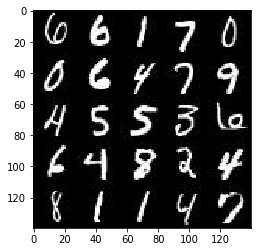

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

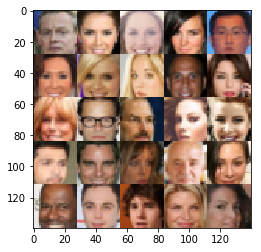

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels),'real_inputs')
    z = tf.placeholder(tf.float32, (None,z_dim),'z_inputs')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')

    return real, z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start\n    super(ZMQIOLoop, self).start()', 'File "/opt/co

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    with tf.variable_scope('discriminator', reuse=reuse):
        
        alpha = 0.2
        h1 = tf.layers.conv2d(images, 64, 5, 2, 'same')
        h1 = tf.maximum(alpha * h1, h1)
        h2 = tf.layers.conv2d(h1, 128, 5, 2, 'same')
        h2 = tf.layers.batch_normalization(h2, training=True)
        h2 = tf.maximum(alpha * h2, h2)
        h3 = tf.layers.conv2d(h2, 256, 5, 2, 'same')
        h3 = tf.layers.batch_normalization(h3, training=True)
        h3 = tf.maximum(alpha * h3, h3)
        flat = tf.reshape(h3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        output = tf.sigmoid(logits)
        
    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    with tf.variable_scope('generator', reuse=not is_train):
        alpha = 0.2
        h1 = tf.layers.dense(z, 2*2*512)
        h1 = tf.reshape(h1, (-1, 2, 2, 512))
        h1 = tf.layers.batch_normalization(h1, training=is_train)
        h1 = tf.maximum(alpha * h1, h1)
        h2 = tf.layers.conv2d_transpose(h1, 256, 5, 2, 'valid')
        h2 = tf.layers.batch_normalization(h2, training=is_train)
        h2 = tf.maximum(alpha * h2, h2)
        h3 = tf.layers.conv2d_transpose(h2, 128, 5, 2, 'same')
        h3 = tf.layers.batch_normalization(h3, training=is_train)
        h3 = tf.maximum(alpha * h3, h3)
        logits = tf.layers.conv2d_transpose(h3, out_channel_dim, 5, 2, 'same')
        output = tf.tanh(logits)
    
        return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g = generator(input_z, out_channel_dim)
    dModelReal, dLogitsReal = discriminator(input_real)
    dModelFake, dLogitsFake = discriminator(g, reuse=True)
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=dLogitsReal, labels=tf.ones_like(dModelReal)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=dLogitsFake, labels=tf.zeros_like(dModelFake)))
    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=dLogitsFake, labels=tf.ones_like(dModelFake)))
    
    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    train = tf.trainable_variables()
    d = [var for var in train if var.name.startswith('discriminator')]
    g = [var for var in train if var.name.startswith('generator')]
    dTrain = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d)
    ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    gUpdate = [opt for opt in ops if opt.name.startswith('generator')]
    with tf.control_dependencies(gUpdate):
        gTrain = tf.train.AdamOptimizer(learning_rate, beta1).minimize(g_loss,var_list=g )
    return dTrain, gTrain


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)

    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])

    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            steps = 0
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps +=1
                batch_images = batch_images * 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                
                if steps % 10 == 0:
                    train_loss_d = d_loss.eval({input_real: batch_images, input_z: batch_z})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Batch {}...".format(steps),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, show_n_images, input_z, data_shape[3], data_image_mode)

                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Batch 10... Discriminator Loss: 0.1994... Generator Loss: 15.3279
Epoch 1/2... Batch 20... Discriminator Loss: 0.6846... Generator Loss: 5.8578
Epoch 1/2... Batch 30... Discriminator Loss: 0.0380... Generator Loss: 7.6140
Epoch 1/2... Batch 40... Discriminator Loss: 0.0074... Generator Loss: 8.8735
Epoch 1/2... Batch 50... Discriminator Loss: 0.1899... Generator Loss: 8.2182
Epoch 1/2... Batch 60... Discriminator Loss: 0.0794... Generator Loss: 3.2809
Epoch 1/2... Batch 70... Discriminator Loss: 2.7732... Generator Loss: 13.6534
Epoch 1/2... Batch 80... Discriminator Loss: 3.8233... Generator Loss: 6.7251
Epoch 1/2... Batch 90... Discriminator Loss: 1.5195... Generator Loss: 1.0681
Epoch 1/2... Batch 100... Discriminator Loss: 0.2578... Generator Loss: 2.8420


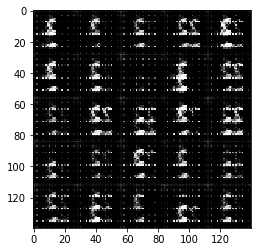

Epoch 1/2... Batch 110... Discriminator Loss: 0.2382... Generator Loss: 2.8877
Epoch 1/2... Batch 120... Discriminator Loss: 1.4127... Generator Loss: 0.4470
Epoch 1/2... Batch 130... Discriminator Loss: 0.4297... Generator Loss: 4.5598
Epoch 1/2... Batch 140... Discriminator Loss: 0.1142... Generator Loss: 3.7767
Epoch 1/2... Batch 150... Discriminator Loss: 0.1619... Generator Loss: 2.9352
Epoch 1/2... Batch 160... Discriminator Loss: 0.2521... Generator Loss: 2.3606
Epoch 1/2... Batch 170... Discriminator Loss: 0.2375... Generator Loss: 2.9685
Epoch 1/2... Batch 180... Discriminator Loss: 0.1330... Generator Loss: 4.3135
Epoch 1/2... Batch 190... Discriminator Loss: 1.4488... Generator Loss: 0.4551
Epoch 1/2... Batch 200... Discriminator Loss: 0.5475... Generator Loss: 1.8297


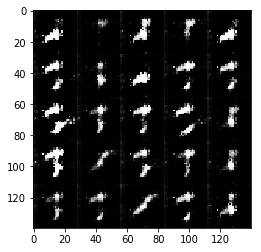

Epoch 1/2... Batch 210... Discriminator Loss: 0.2967... Generator Loss: 2.6683
Epoch 1/2... Batch 220... Discriminator Loss: 0.1897... Generator Loss: 4.9482
Epoch 1/2... Batch 230... Discriminator Loss: 0.0807... Generator Loss: 3.4672
Epoch 1/2... Batch 240... Discriminator Loss: 0.8257... Generator Loss: 11.2411
Epoch 1/2... Batch 250... Discriminator Loss: 0.2050... Generator Loss: 3.4675
Epoch 1/2... Batch 260... Discriminator Loss: 0.5108... Generator Loss: 1.9201
Epoch 1/2... Batch 270... Discriminator Loss: 0.1082... Generator Loss: 3.5531
Epoch 1/2... Batch 280... Discriminator Loss: 0.1093... Generator Loss: 5.1077
Epoch 1/2... Batch 290... Discriminator Loss: 0.1930... Generator Loss: 5.4802
Epoch 1/2... Batch 300... Discriminator Loss: 0.2317... Generator Loss: 2.8301


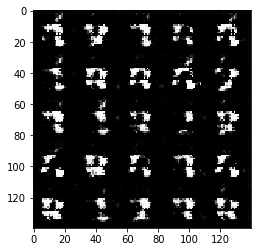

Epoch 1/2... Batch 310... Discriminator Loss: 0.4066... Generator Loss: 8.6745
Epoch 1/2... Batch 320... Discriminator Loss: 0.2366... Generator Loss: 2.2544
Epoch 1/2... Batch 330... Discriminator Loss: 0.2508... Generator Loss: 2.4375
Epoch 1/2... Batch 340... Discriminator Loss: 2.1443... Generator Loss: 9.1712
Epoch 1/2... Batch 350... Discriminator Loss: 0.3469... Generator Loss: 2.4358
Epoch 1/2... Batch 360... Discriminator Loss: 0.2483... Generator Loss: 4.5845
Epoch 1/2... Batch 370... Discriminator Loss: 0.4425... Generator Loss: 7.4836
Epoch 1/2... Batch 380... Discriminator Loss: 0.4204... Generator Loss: 1.8066
Epoch 1/2... Batch 390... Discriminator Loss: 1.7153... Generator Loss: 0.5602
Epoch 1/2... Batch 400... Discriminator Loss: 0.5175... Generator Loss: 3.3876


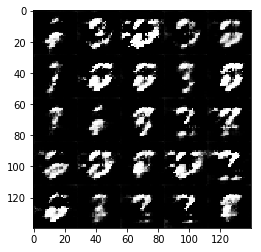

Epoch 1/2... Batch 410... Discriminator Loss: 0.4872... Generator Loss: 1.6557
Epoch 1/2... Batch 420... Discriminator Loss: 0.4971... Generator Loss: 2.2220
Epoch 1/2... Batch 430... Discriminator Loss: 0.2919... Generator Loss: 2.4122
Epoch 1/2... Batch 440... Discriminator Loss: 0.5430... Generator Loss: 1.3154
Epoch 1/2... Batch 450... Discriminator Loss: 0.5277... Generator Loss: 2.5294
Epoch 1/2... Batch 460... Discriminator Loss: 0.3516... Generator Loss: 2.2129
Epoch 2/2... Batch 10... Discriminator Loss: 0.3052... Generator Loss: 3.5216
Epoch 2/2... Batch 20... Discriminator Loss: 0.9672... Generator Loss: 1.0487
Epoch 2/2... Batch 30... Discriminator Loss: 1.2022... Generator Loss: 5.7049
Epoch 2/2... Batch 40... Discriminator Loss: 1.6706... Generator Loss: 0.4252
Epoch 2/2... Batch 50... Discriminator Loss: 0.4548... Generator Loss: 1.8583
Epoch 2/2... Batch 60... Discriminator Loss: 0.4692... Generator Loss: 3.0692
Epoch 2/2... Batch 70... Discriminator Loss: 0.6646... Gen

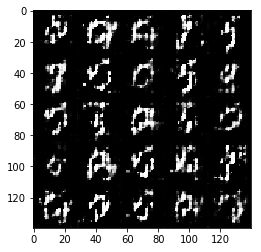

Epoch 2/2... Batch 110... Discriminator Loss: 0.9912... Generator Loss: 5.3245
Epoch 2/2... Batch 120... Discriminator Loss: 0.4600... Generator Loss: 1.8584
Epoch 2/2... Batch 130... Discriminator Loss: 0.5144... Generator Loss: 1.5614
Epoch 2/2... Batch 140... Discriminator Loss: 0.3976... Generator Loss: 2.3325
Epoch 2/2... Batch 150... Discriminator Loss: 0.5299... Generator Loss: 2.1433
Epoch 2/2... Batch 160... Discriminator Loss: 0.5131... Generator Loss: 3.6134
Epoch 2/2... Batch 170... Discriminator Loss: 0.7034... Generator Loss: 1.2967
Epoch 2/2... Batch 180... Discriminator Loss: 0.9183... Generator Loss: 0.9711
Epoch 2/2... Batch 190... Discriminator Loss: 0.6229... Generator Loss: 2.4520
Epoch 2/2... Batch 200... Discriminator Loss: 0.5206... Generator Loss: 1.7328


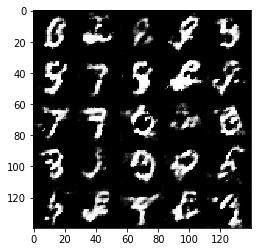

Epoch 2/2... Batch 210... Discriminator Loss: 0.7086... Generator Loss: 1.8462
Epoch 2/2... Batch 220... Discriminator Loss: 0.7586... Generator Loss: 1.8245
Epoch 2/2... Batch 230... Discriminator Loss: 0.7483... Generator Loss: 1.0612
Epoch 2/2... Batch 240... Discriminator Loss: 0.7428... Generator Loss: 1.0054
Epoch 2/2... Batch 250... Discriminator Loss: 0.5665... Generator Loss: 1.8828
Epoch 2/2... Batch 260... Discriminator Loss: 1.3497... Generator Loss: 0.5544
Epoch 2/2... Batch 270... Discriminator Loss: 0.5683... Generator Loss: 2.2391
Epoch 2/2... Batch 280... Discriminator Loss: 0.7641... Generator Loss: 1.1405
Epoch 2/2... Batch 290... Discriminator Loss: 1.1705... Generator Loss: 2.8049
Epoch 2/2... Batch 300... Discriminator Loss: 0.5887... Generator Loss: 1.9301


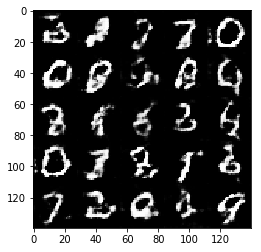

Epoch 2/2... Batch 310... Discriminator Loss: 0.9949... Generator Loss: 2.6284
Epoch 2/2... Batch 320... Discriminator Loss: 0.7136... Generator Loss: 1.1756
Epoch 2/2... Batch 330... Discriminator Loss: 1.1020... Generator Loss: 0.7270
Epoch 2/2... Batch 340... Discriminator Loss: 0.9237... Generator Loss: 1.0923
Epoch 2/2... Batch 350... Discriminator Loss: 0.7600... Generator Loss: 2.4486
Epoch 2/2... Batch 360... Discriminator Loss: 0.6807... Generator Loss: 1.0581
Epoch 2/2... Batch 370... Discriminator Loss: 0.8419... Generator Loss: 1.0919
Epoch 2/2... Batch 380... Discriminator Loss: 0.6700... Generator Loss: 1.4411
Epoch 2/2... Batch 390... Discriminator Loss: 0.6330... Generator Loss: 1.6591
Epoch 2/2... Batch 400... Discriminator Loss: 1.0745... Generator Loss: 3.0084


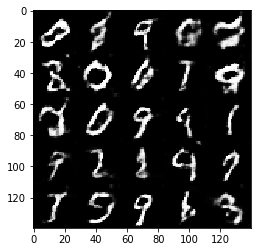

Epoch 2/2... Batch 410... Discriminator Loss: 0.8443... Generator Loss: 1.0941
Epoch 2/2... Batch 420... Discriminator Loss: 1.2340... Generator Loss: 0.5458
Epoch 2/2... Batch 430... Discriminator Loss: 0.9115... Generator Loss: 2.1405
Epoch 2/2... Batch 440... Discriminator Loss: 1.0352... Generator Loss: 0.6602
Epoch 2/2... Batch 450... Discriminator Loss: 0.9074... Generator Loss: 2.1593
Epoch 2/2... Batch 460... Discriminator Loss: 0.8927... Generator Loss: 0.8828


In [17]:
batch_size = 128
z_dim = 128
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Batch 10... Discriminator Loss: 4.5882... Generator Loss: 0.0135
Epoch 1/1... Batch 20... Discriminator Loss: 1.6251... Generator Loss: 7.9271
Epoch 1/1... Batch 30... Discriminator Loss: 0.7060... Generator Loss: 1.3884
Epoch 1/1... Batch 40... Discriminator Loss: 0.3611... Generator Loss: 2.9843
Epoch 1/1... Batch 50... Discriminator Loss: 0.6444... Generator Loss: 1.2291
Epoch 1/1... Batch 60... Discriminator Loss: 4.0394... Generator Loss: 9.4225
Epoch 1/1... Batch 70... Discriminator Loss: 0.2107... Generator Loss: 2.4759
Epoch 1/1... Batch 80... Discriminator Loss: 0.5441... Generator Loss: 1.1740
Epoch 1/1... Batch 90... Discriminator Loss: 0.4263... Generator Loss: 5.4266
Epoch 1/1... Batch 100... Discriminator Loss: 0.1568... Generator Loss: 5.5026


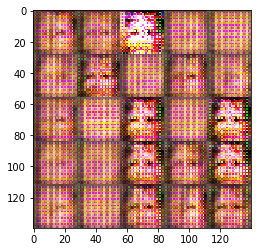

Epoch 1/1... Batch 110... Discriminator Loss: 0.2715... Generator Loss: 4.0664
Epoch 1/1... Batch 120... Discriminator Loss: 0.5831... Generator Loss: 3.2081
Epoch 1/1... Batch 130... Discriminator Loss: 0.2541... Generator Loss: 2.0404
Epoch 1/1... Batch 140... Discriminator Loss: 0.6030... Generator Loss: 1.0540
Epoch 1/1... Batch 150... Discriminator Loss: 0.9628... Generator Loss: 0.7066
Epoch 1/1... Batch 160... Discriminator Loss: 0.4508... Generator Loss: 1.4640
Epoch 1/1... Batch 170... Discriminator Loss: 1.3981... Generator Loss: 0.4360
Epoch 1/1... Batch 180... Discriminator Loss: 0.3730... Generator Loss: 2.1038
Epoch 1/1... Batch 190... Discriminator Loss: 1.4473... Generator Loss: 4.6808
Epoch 1/1... Batch 200... Discriminator Loss: 2.3724... Generator Loss: 4.1158


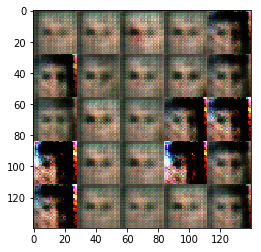

Epoch 1/1... Batch 210... Discriminator Loss: 1.5542... Generator Loss: 2.6275
Epoch 1/1... Batch 220... Discriminator Loss: 1.2530... Generator Loss: 1.4356
Epoch 1/1... Batch 230... Discriminator Loss: 1.3244... Generator Loss: 0.5983
Epoch 1/1... Batch 240... Discriminator Loss: 0.4951... Generator Loss: 1.9312
Epoch 1/1... Batch 250... Discriminator Loss: 3.6418... Generator Loss: 5.7159
Epoch 1/1... Batch 260... Discriminator Loss: 1.1891... Generator Loss: 0.6361
Epoch 1/1... Batch 270... Discriminator Loss: 0.6159... Generator Loss: 1.1578
Epoch 1/1... Batch 280... Discriminator Loss: 0.7305... Generator Loss: 1.0817
Epoch 1/1... Batch 290... Discriminator Loss: 1.6316... Generator Loss: 0.6778
Epoch 1/1... Batch 300... Discriminator Loss: 0.9497... Generator Loss: 1.4609


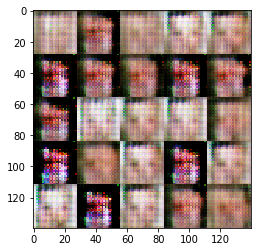

Epoch 1/1... Batch 310... Discriminator Loss: 1.2374... Generator Loss: 3.1117
Epoch 1/1... Batch 320... Discriminator Loss: 1.5824... Generator Loss: 0.8480
Epoch 1/1... Batch 330... Discriminator Loss: 0.5226... Generator Loss: 1.3466
Epoch 1/1... Batch 340... Discriminator Loss: 1.5073... Generator Loss: 0.7060
Epoch 1/1... Batch 350... Discriminator Loss: 1.2976... Generator Loss: 1.4087
Epoch 1/1... Batch 360... Discriminator Loss: 1.2020... Generator Loss: 0.7061
Epoch 1/1... Batch 370... Discriminator Loss: 0.9328... Generator Loss: 1.2963
Epoch 1/1... Batch 380... Discriminator Loss: 0.9153... Generator Loss: 0.8098
Epoch 1/1... Batch 390... Discriminator Loss: 0.9951... Generator Loss: 1.0247
Epoch 1/1... Batch 400... Discriminator Loss: 1.6375... Generator Loss: 3.1442


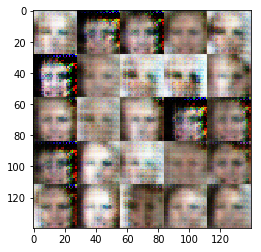

Epoch 1/1... Batch 410... Discriminator Loss: 1.3073... Generator Loss: 1.2001
Epoch 1/1... Batch 420... Discriminator Loss: 1.3692... Generator Loss: 1.4948
Epoch 1/1... Batch 430... Discriminator Loss: 1.1299... Generator Loss: 1.0945
Epoch 1/1... Batch 440... Discriminator Loss: 1.3077... Generator Loss: 0.5064
Epoch 1/1... Batch 450... Discriminator Loss: 1.1837... Generator Loss: 0.8498
Epoch 1/1... Batch 460... Discriminator Loss: 1.2492... Generator Loss: 0.5361
Epoch 1/1... Batch 470... Discriminator Loss: 0.9205... Generator Loss: 1.0889
Epoch 1/1... Batch 480... Discriminator Loss: 0.9832... Generator Loss: 0.9813
Epoch 1/1... Batch 490... Discriminator Loss: 1.3502... Generator Loss: 0.6351
Epoch 1/1... Batch 500... Discriminator Loss: 0.8300... Generator Loss: 0.9918


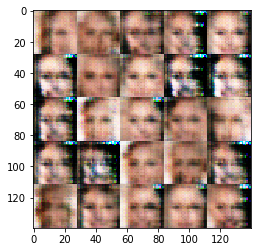

Epoch 1/1... Batch 510... Discriminator Loss: 1.4574... Generator Loss: 0.4949
Epoch 1/1... Batch 520... Discriminator Loss: 0.8962... Generator Loss: 0.9116
Epoch 1/1... Batch 530... Discriminator Loss: 0.9359... Generator Loss: 1.5268
Epoch 1/1... Batch 540... Discriminator Loss: 1.2960... Generator Loss: 0.5117
Epoch 1/1... Batch 550... Discriminator Loss: 1.2135... Generator Loss: 0.7935
Epoch 1/1... Batch 560... Discriminator Loss: 0.9112... Generator Loss: 1.1972
Epoch 1/1... Batch 570... Discriminator Loss: 0.9369... Generator Loss: 1.6764
Epoch 1/1... Batch 580... Discriminator Loss: 1.1277... Generator Loss: 0.6889
Epoch 1/1... Batch 590... Discriminator Loss: 1.4744... Generator Loss: 1.2657
Epoch 1/1... Batch 600... Discriminator Loss: 1.1129... Generator Loss: 1.0009


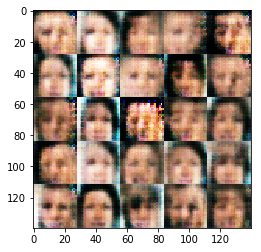

Epoch 1/1... Batch 610... Discriminator Loss: 0.9880... Generator Loss: 1.1016
Epoch 1/1... Batch 620... Discriminator Loss: 0.9491... Generator Loss: 1.4856
Epoch 1/1... Batch 630... Discriminator Loss: 1.2181... Generator Loss: 1.7719
Epoch 1/1... Batch 640... Discriminator Loss: 1.2903... Generator Loss: 2.2316
Epoch 1/1... Batch 650... Discriminator Loss: 1.1555... Generator Loss: 1.2064
Epoch 1/1... Batch 660... Discriminator Loss: 0.9963... Generator Loss: 1.2331
Epoch 1/1... Batch 670... Discriminator Loss: 1.5150... Generator Loss: 1.9716
Epoch 1/1... Batch 680... Discriminator Loss: 1.2151... Generator Loss: 2.0696
Epoch 1/1... Batch 690... Discriminator Loss: 0.7664... Generator Loss: 1.3073
Epoch 1/1... Batch 700... Discriminator Loss: 0.7567... Generator Loss: 1.2116


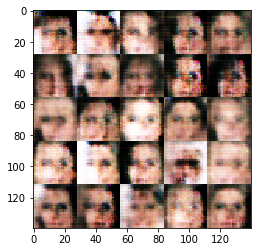

Epoch 1/1... Batch 710... Discriminator Loss: 0.9707... Generator Loss: 0.7017
Epoch 1/1... Batch 720... Discriminator Loss: 0.7279... Generator Loss: 1.0690
Epoch 1/1... Batch 730... Discriminator Loss: 0.7637... Generator Loss: 1.3146
Epoch 1/1... Batch 740... Discriminator Loss: 1.6623... Generator Loss: 0.2984
Epoch 1/1... Batch 750... Discriminator Loss: 0.7707... Generator Loss: 0.9200
Epoch 1/1... Batch 760... Discriminator Loss: 1.0301... Generator Loss: 0.7206
Epoch 1/1... Batch 770... Discriminator Loss: 1.4068... Generator Loss: 0.7740
Epoch 1/1... Batch 780... Discriminator Loss: 1.0163... Generator Loss: 2.5465
Epoch 1/1... Batch 790... Discriminator Loss: 0.8408... Generator Loss: 1.9821
Epoch 1/1... Batch 800... Discriminator Loss: 1.4996... Generator Loss: 2.6149


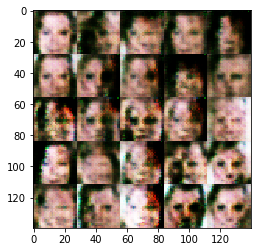

Epoch 1/1... Batch 810... Discriminator Loss: 1.2004... Generator Loss: 0.8281
Epoch 1/1... Batch 820... Discriminator Loss: 0.7360... Generator Loss: 1.7296
Epoch 1/1... Batch 830... Discriminator Loss: 1.0300... Generator Loss: 0.7261
Epoch 1/1... Batch 840... Discriminator Loss: 0.8764... Generator Loss: 2.0602
Epoch 1/1... Batch 850... Discriminator Loss: 1.6799... Generator Loss: 0.3025
Epoch 1/1... Batch 860... Discriminator Loss: 1.0146... Generator Loss: 0.8346
Epoch 1/1... Batch 870... Discriminator Loss: 0.5923... Generator Loss: 1.4781
Epoch 1/1... Batch 880... Discriminator Loss: 0.9776... Generator Loss: 1.1599
Epoch 1/1... Batch 890... Discriminator Loss: 0.7627... Generator Loss: 1.1840
Epoch 1/1... Batch 900... Discriminator Loss: 0.7066... Generator Loss: 1.1042


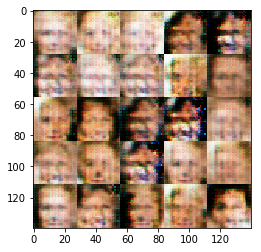

Epoch 1/1... Batch 910... Discriminator Loss: 1.0259... Generator Loss: 0.8922
Epoch 1/1... Batch 920... Discriminator Loss: 0.7574... Generator Loss: 0.9616
Epoch 1/1... Batch 930... Discriminator Loss: 1.5264... Generator Loss: 2.1977
Epoch 1/1... Batch 940... Discriminator Loss: 1.5636... Generator Loss: 0.3877
Epoch 1/1... Batch 950... Discriminator Loss: 0.9372... Generator Loss: 0.7366
Epoch 1/1... Batch 960... Discriminator Loss: 1.1976... Generator Loss: 2.0481
Epoch 1/1... Batch 970... Discriminator Loss: 1.2540... Generator Loss: 1.1389
Epoch 1/1... Batch 980... Discriminator Loss: 0.9496... Generator Loss: 1.2045
Epoch 1/1... Batch 990... Discriminator Loss: 1.7891... Generator Loss: 0.2540
Epoch 1/1... Batch 1000... Discriminator Loss: 1.1977... Generator Loss: 1.1255


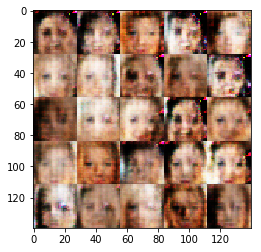

Epoch 1/1... Batch 1010... Discriminator Loss: 1.0446... Generator Loss: 1.4935
Epoch 1/1... Batch 1020... Discriminator Loss: 0.9353... Generator Loss: 1.4722
Epoch 1/1... Batch 1030... Discriminator Loss: 1.0306... Generator Loss: 1.9537
Epoch 1/1... Batch 1040... Discriminator Loss: 1.0047... Generator Loss: 0.9850
Epoch 1/1... Batch 1050... Discriminator Loss: 1.2601... Generator Loss: 0.7222
Epoch 1/1... Batch 1060... Discriminator Loss: 1.2752... Generator Loss: 2.3045
Epoch 1/1... Batch 1070... Discriminator Loss: 1.9887... Generator Loss: 0.1916
Epoch 1/1... Batch 1080... Discriminator Loss: 0.9064... Generator Loss: 1.2498
Epoch 1/1... Batch 1090... Discriminator Loss: 1.1590... Generator Loss: 1.0975
Epoch 1/1... Batch 1100... Discriminator Loss: 1.1546... Generator Loss: 0.7898


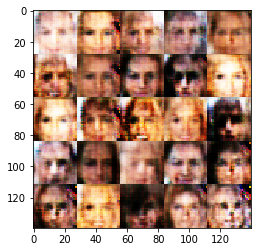

Epoch 1/1... Batch 1110... Discriminator Loss: 0.7834... Generator Loss: 1.3291
Epoch 1/1... Batch 1120... Discriminator Loss: 0.9366... Generator Loss: 0.9555
Epoch 1/1... Batch 1130... Discriminator Loss: 1.1793... Generator Loss: 0.6719
Epoch 1/1... Batch 1140... Discriminator Loss: 1.0264... Generator Loss: 0.6544
Epoch 1/1... Batch 1150... Discriminator Loss: 1.1301... Generator Loss: 0.5675
Epoch 1/1... Batch 1160... Discriminator Loss: 1.0616... Generator Loss: 1.3581
Epoch 1/1... Batch 1170... Discriminator Loss: 0.9907... Generator Loss: 0.7054
Epoch 1/1... Batch 1180... Discriminator Loss: 1.9061... Generator Loss: 0.3005
Epoch 1/1... Batch 1190... Discriminator Loss: 1.4697... Generator Loss: 1.2742
Epoch 1/1... Batch 1200... Discriminator Loss: 1.0121... Generator Loss: 1.9193


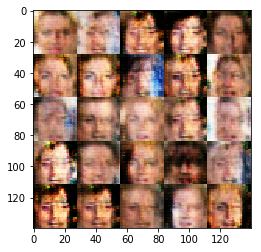

Epoch 1/1... Batch 1210... Discriminator Loss: 1.1063... Generator Loss: 1.5327
Epoch 1/1... Batch 1220... Discriminator Loss: 1.1610... Generator Loss: 1.0446
Epoch 1/1... Batch 1230... Discriminator Loss: 1.4691... Generator Loss: 0.3916
Epoch 1/1... Batch 1240... Discriminator Loss: 0.5864... Generator Loss: 1.7019
Epoch 1/1... Batch 1250... Discriminator Loss: 1.0637... Generator Loss: 0.8269
Epoch 1/1... Batch 1260... Discriminator Loss: 1.0137... Generator Loss: 1.2144
Epoch 1/1... Batch 1270... Discriminator Loss: 0.9061... Generator Loss: 1.1932
Epoch 1/1... Batch 1280... Discriminator Loss: 1.1908... Generator Loss: 0.6722
Epoch 1/1... Batch 1290... Discriminator Loss: 1.0693... Generator Loss: 1.3522
Epoch 1/1... Batch 1300... Discriminator Loss: 1.0621... Generator Loss: 0.7274


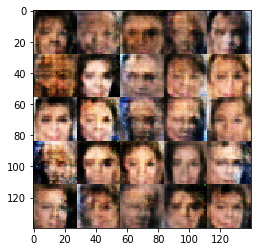

Epoch 1/1... Batch 1310... Discriminator Loss: 1.0335... Generator Loss: 0.6809
Epoch 1/1... Batch 1320... Discriminator Loss: 1.1187... Generator Loss: 1.2235
Epoch 1/1... Batch 1330... Discriminator Loss: 1.2390... Generator Loss: 0.5143
Epoch 1/1... Batch 1340... Discriminator Loss: 1.1869... Generator Loss: 0.8620
Epoch 1/1... Batch 1350... Discriminator Loss: 1.1813... Generator Loss: 0.6347
Epoch 1/1... Batch 1360... Discriminator Loss: 0.9910... Generator Loss: 0.8440
Epoch 1/1... Batch 1370... Discriminator Loss: 1.3371... Generator Loss: 2.6334
Epoch 1/1... Batch 1380... Discriminator Loss: 1.3607... Generator Loss: 0.5152
Epoch 1/1... Batch 1390... Discriminator Loss: 0.9590... Generator Loss: 0.7205
Epoch 1/1... Batch 1400... Discriminator Loss: 0.8997... Generator Loss: 1.4802


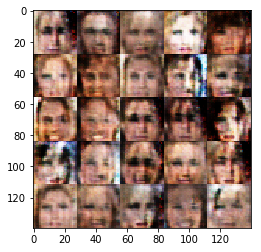

Epoch 1/1... Batch 1410... Discriminator Loss: 1.4911... Generator Loss: 0.4102
Epoch 1/1... Batch 1420... Discriminator Loss: 1.3235... Generator Loss: 0.5161
Epoch 1/1... Batch 1430... Discriminator Loss: 1.3431... Generator Loss: 0.5854
Epoch 1/1... Batch 1440... Discriminator Loss: 1.2912... Generator Loss: 0.6953
Epoch 1/1... Batch 1450... Discriminator Loss: 0.9044... Generator Loss: 1.0344
Epoch 1/1... Batch 1460... Discriminator Loss: 1.7050... Generator Loss: 0.3135
Epoch 1/1... Batch 1470... Discriminator Loss: 1.5148... Generator Loss: 0.4109
Epoch 1/1... Batch 1480... Discriminator Loss: 1.0554... Generator Loss: 1.1098
Epoch 1/1... Batch 1490... Discriminator Loss: 1.2405... Generator Loss: 0.5306
Epoch 1/1... Batch 1500... Discriminator Loss: 1.2859... Generator Loss: 0.5554


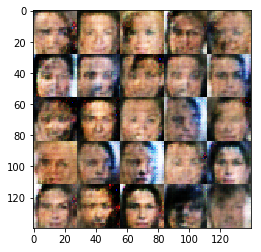

Epoch 1/1... Batch 1510... Discriminator Loss: 1.1712... Generator Loss: 1.0296
Epoch 1/1... Batch 1520... Discriminator Loss: 1.2918... Generator Loss: 1.7394
Epoch 1/1... Batch 1530... Discriminator Loss: 1.0872... Generator Loss: 0.8743
Epoch 1/1... Batch 1540... Discriminator Loss: 0.9284... Generator Loss: 1.3162
Epoch 1/1... Batch 1550... Discriminator Loss: 1.1243... Generator Loss: 0.9980
Epoch 1/1... Batch 1560... Discriminator Loss: 1.3085... Generator Loss: 2.0450
Epoch 1/1... Batch 1570... Discriminator Loss: 1.1795... Generator Loss: 0.6403
Epoch 1/1... Batch 1580... Discriminator Loss: 1.2137... Generator Loss: 0.9671
Epoch 1/1... Batch 1590... Discriminator Loss: 1.0513... Generator Loss: 1.3944
Epoch 1/1... Batch 1600... Discriminator Loss: 0.8918... Generator Loss: 1.0323


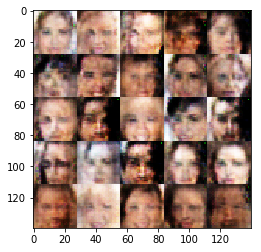

Epoch 1/1... Batch 1610... Discriminator Loss: 0.7216... Generator Loss: 1.0430
Epoch 1/1... Batch 1620... Discriminator Loss: 0.9496... Generator Loss: 0.8553
Epoch 1/1... Batch 1630... Discriminator Loss: 1.0363... Generator Loss: 0.6996
Epoch 1/1... Batch 1640... Discriminator Loss: 1.1534... Generator Loss: 0.6631
Epoch 1/1... Batch 1650... Discriminator Loss: 1.2672... Generator Loss: 2.1780
Epoch 1/1... Batch 1660... Discriminator Loss: 1.2014... Generator Loss: 1.6260
Epoch 1/1... Batch 1670... Discriminator Loss: 0.9545... Generator Loss: 0.8120
Epoch 1/1... Batch 1680... Discriminator Loss: 1.7204... Generator Loss: 2.3835
Epoch 1/1... Batch 1690... Discriminator Loss: 1.0159... Generator Loss: 0.7511
Epoch 1/1... Batch 1700... Discriminator Loss: 1.1266... Generator Loss: 0.7970


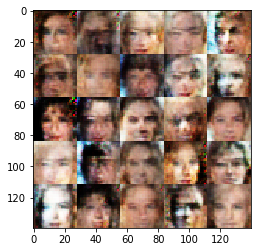

Epoch 1/1... Batch 1710... Discriminator Loss: 1.2832... Generator Loss: 2.0159
Epoch 1/1... Batch 1720... Discriminator Loss: 1.0635... Generator Loss: 1.8123
Epoch 1/1... Batch 1730... Discriminator Loss: 0.9958... Generator Loss: 0.8132
Epoch 1/1... Batch 1740... Discriminator Loss: 1.0978... Generator Loss: 1.2987
Epoch 1/1... Batch 1750... Discriminator Loss: 1.1641... Generator Loss: 0.8323
Epoch 1/1... Batch 1760... Discriminator Loss: 1.4490... Generator Loss: 0.4584
Epoch 1/1... Batch 1770... Discriminator Loss: 1.0060... Generator Loss: 0.8379
Epoch 1/1... Batch 1780... Discriminator Loss: 1.0031... Generator Loss: 0.8111
Epoch 1/1... Batch 1790... Discriminator Loss: 1.9649... Generator Loss: 0.2082
Epoch 1/1... Batch 1800... Discriminator Loss: 1.0694... Generator Loss: 0.7419


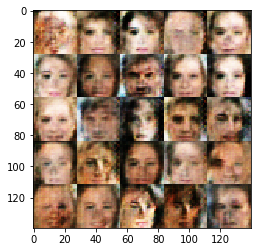

Epoch 1/1... Batch 1810... Discriminator Loss: 0.9628... Generator Loss: 1.2006
Epoch 1/1... Batch 1820... Discriminator Loss: 1.2090... Generator Loss: 0.6260
Epoch 1/1... Batch 1830... Discriminator Loss: 1.2959... Generator Loss: 1.7674
Epoch 1/1... Batch 1840... Discriminator Loss: 1.0831... Generator Loss: 0.9438
Epoch 1/1... Batch 1850... Discriminator Loss: 1.0007... Generator Loss: 1.0417
Epoch 1/1... Batch 1860... Discriminator Loss: 1.1793... Generator Loss: 0.5675
Epoch 1/1... Batch 1870... Discriminator Loss: 0.9964... Generator Loss: 0.9904
Epoch 1/1... Batch 1880... Discriminator Loss: 1.0945... Generator Loss: 2.3994
Epoch 1/1... Batch 1890... Discriminator Loss: 1.1026... Generator Loss: 0.9128
Epoch 1/1... Batch 1900... Discriminator Loss: 1.2232... Generator Loss: 1.3292


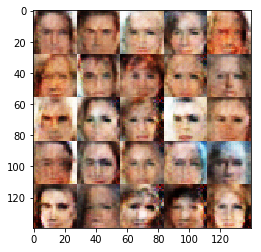

Epoch 1/1... Batch 1910... Discriminator Loss: 1.1907... Generator Loss: 1.4547
Epoch 1/1... Batch 1920... Discriminator Loss: 1.2001... Generator Loss: 0.7749
Epoch 1/1... Batch 1930... Discriminator Loss: 0.8707... Generator Loss: 1.1249
Epoch 1/1... Batch 1940... Discriminator Loss: 0.5042... Generator Loss: 1.7053
Epoch 1/1... Batch 1950... Discriminator Loss: 1.1752... Generator Loss: 0.6388
Epoch 1/1... Batch 1960... Discriminator Loss: 0.9765... Generator Loss: 1.3071
Epoch 1/1... Batch 1970... Discriminator Loss: 0.9407... Generator Loss: 0.7156
Epoch 1/1... Batch 1980... Discriminator Loss: 1.4032... Generator Loss: 0.4332
Epoch 1/1... Batch 1990... Discriminator Loss: 0.8646... Generator Loss: 1.2394
Epoch 1/1... Batch 2000... Discriminator Loss: 1.0667... Generator Loss: 1.2787


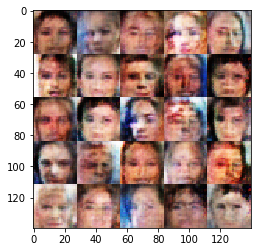

Epoch 1/1... Batch 2010... Discriminator Loss: 1.2014... Generator Loss: 1.5424
Epoch 1/1... Batch 2020... Discriminator Loss: 1.0971... Generator Loss: 0.7620
Epoch 1/1... Batch 2030... Discriminator Loss: 0.8781... Generator Loss: 1.2538
Epoch 1/1... Batch 2040... Discriminator Loss: 0.9973... Generator Loss: 1.0841
Epoch 1/1... Batch 2050... Discriminator Loss: 1.0412... Generator Loss: 1.4083
Epoch 1/1... Batch 2060... Discriminator Loss: 1.0193... Generator Loss: 0.8014
Epoch 1/1... Batch 2070... Discriminator Loss: 1.0081... Generator Loss: 1.1374
Epoch 1/1... Batch 2080... Discriminator Loss: 1.3296... Generator Loss: 0.5294
Epoch 1/1... Batch 2090... Discriminator Loss: 1.3815... Generator Loss: 1.2244
Epoch 1/1... Batch 2100... Discriminator Loss: 1.2403... Generator Loss: 0.8962


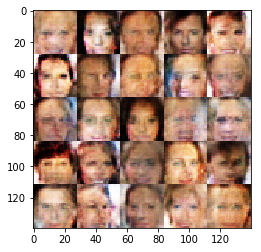

Epoch 1/1... Batch 2110... Discriminator Loss: 1.2056... Generator Loss: 1.9728
Epoch 1/1... Batch 2120... Discriminator Loss: 1.0866... Generator Loss: 0.6973
Epoch 1/1... Batch 2130... Discriminator Loss: 0.6860... Generator Loss: 1.7308
Epoch 1/1... Batch 2140... Discriminator Loss: 1.0899... Generator Loss: 1.0314
Epoch 1/1... Batch 2150... Discriminator Loss: 1.1661... Generator Loss: 0.9889
Epoch 1/1... Batch 2160... Discriminator Loss: 1.1833... Generator Loss: 0.5308
Epoch 1/1... Batch 2170... Discriminator Loss: 0.9374... Generator Loss: 1.0110
Epoch 1/1... Batch 2180... Discriminator Loss: 1.3606... Generator Loss: 1.1266
Epoch 1/1... Batch 2190... Discriminator Loss: 1.9389... Generator Loss: 0.2046
Epoch 1/1... Batch 2200... Discriminator Loss: 1.0253... Generator Loss: 0.6419


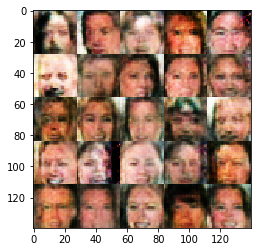

Epoch 1/1... Batch 2210... Discriminator Loss: 1.0197... Generator Loss: 1.6795
Epoch 1/1... Batch 2220... Discriminator Loss: 0.9865... Generator Loss: 0.8660
Epoch 1/1... Batch 2230... Discriminator Loss: 1.1769... Generator Loss: 1.4792
Epoch 1/1... Batch 2240... Discriminator Loss: 1.1459... Generator Loss: 1.0754
Epoch 1/1... Batch 2250... Discriminator Loss: 0.8079... Generator Loss: 2.3426
Epoch 1/1... Batch 2260... Discriminator Loss: 1.1068... Generator Loss: 0.9039
Epoch 1/1... Batch 2270... Discriminator Loss: 1.1026... Generator Loss: 0.9821
Epoch 1/1... Batch 2280... Discriminator Loss: 1.0606... Generator Loss: 0.7869
Epoch 1/1... Batch 2290... Discriminator Loss: 1.3109... Generator Loss: 0.6049
Epoch 1/1... Batch 2300... Discriminator Loss: 1.2870... Generator Loss: 1.1401


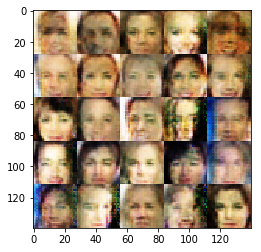

Epoch 1/1... Batch 2310... Discriminator Loss: 1.0411... Generator Loss: 1.1958
Epoch 1/1... Batch 2320... Discriminator Loss: 0.9104... Generator Loss: 1.2449
Epoch 1/1... Batch 2330... Discriminator Loss: 0.9975... Generator Loss: 1.2254
Epoch 1/1... Batch 2340... Discriminator Loss: 1.7293... Generator Loss: 1.6059
Epoch 1/1... Batch 2350... Discriminator Loss: 1.0198... Generator Loss: 0.7223
Epoch 1/1... Batch 2360... Discriminator Loss: 1.1013... Generator Loss: 0.6925
Epoch 1/1... Batch 2370... Discriminator Loss: 1.2111... Generator Loss: 0.5804
Epoch 1/1... Batch 2380... Discriminator Loss: 1.6596... Generator Loss: 1.7680
Epoch 1/1... Batch 2390... Discriminator Loss: 0.9257... Generator Loss: 0.9642
Epoch 1/1... Batch 2400... Discriminator Loss: 1.1439... Generator Loss: 1.4108


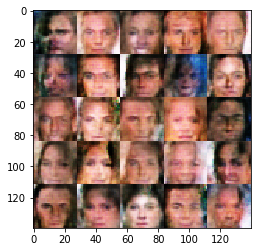

Epoch 1/1... Batch 2410... Discriminator Loss: 1.0657... Generator Loss: 0.6912
Epoch 1/1... Batch 2420... Discriminator Loss: 1.5861... Generator Loss: 2.1183
Epoch 1/1... Batch 2430... Discriminator Loss: 1.3243... Generator Loss: 1.3124
Epoch 1/1... Batch 2440... Discriminator Loss: 1.3493... Generator Loss: 1.6182
Epoch 1/1... Batch 2450... Discriminator Loss: 1.0456... Generator Loss: 1.2397
Epoch 1/1... Batch 2460... Discriminator Loss: 1.0145... Generator Loss: 0.8678
Epoch 1/1... Batch 2470... Discriminator Loss: 0.8060... Generator Loss: 1.4509
Epoch 1/1... Batch 2480... Discriminator Loss: 0.9898... Generator Loss: 1.5217
Epoch 1/1... Batch 2490... Discriminator Loss: 1.0799... Generator Loss: 0.8022
Epoch 1/1... Batch 2500... Discriminator Loss: 0.8186... Generator Loss: 1.0865


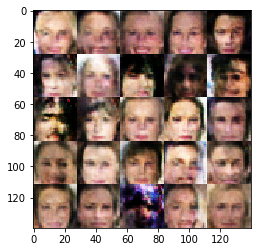

Epoch 1/1... Batch 2510... Discriminator Loss: 0.9208... Generator Loss: 1.0474
Epoch 1/1... Batch 2520... Discriminator Loss: 1.0787... Generator Loss: 0.7262
Epoch 1/1... Batch 2530... Discriminator Loss: 1.2087... Generator Loss: 0.6379
Epoch 1/1... Batch 2540... Discriminator Loss: 1.2766... Generator Loss: 0.9339
Epoch 1/1... Batch 2550... Discriminator Loss: 1.3978... Generator Loss: 2.4301
Epoch 1/1... Batch 2560... Discriminator Loss: 1.2130... Generator Loss: 0.5304
Epoch 1/1... Batch 2570... Discriminator Loss: 1.1420... Generator Loss: 0.7128
Epoch 1/1... Batch 2580... Discriminator Loss: 2.1129... Generator Loss: 3.2589
Epoch 1/1... Batch 2590... Discriminator Loss: 1.0248... Generator Loss: 0.8098
Epoch 1/1... Batch 2600... Discriminator Loss: 0.9967... Generator Loss: 0.9840


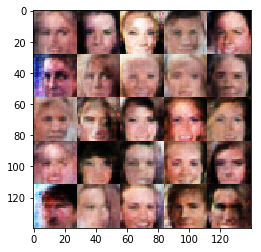

Epoch 1/1... Batch 2610... Discriminator Loss: 1.1246... Generator Loss: 0.7526
Epoch 1/1... Batch 2620... Discriminator Loss: 1.1190... Generator Loss: 0.8869
Epoch 1/1... Batch 2630... Discriminator Loss: 2.1857... Generator Loss: 0.2007
Epoch 1/1... Batch 2640... Discriminator Loss: 0.9984... Generator Loss: 1.2447
Epoch 1/1... Batch 2650... Discriminator Loss: 0.9825... Generator Loss: 0.8999
Epoch 1/1... Batch 2660... Discriminator Loss: 1.2245... Generator Loss: 0.6986
Epoch 1/1... Batch 2670... Discriminator Loss: 0.8860... Generator Loss: 0.8944
Epoch 1/1... Batch 2680... Discriminator Loss: 1.2351... Generator Loss: 0.8754
Epoch 1/1... Batch 2690... Discriminator Loss: 0.9849... Generator Loss: 0.9920
Epoch 1/1... Batch 2700... Discriminator Loss: 1.0636... Generator Loss: 0.7331


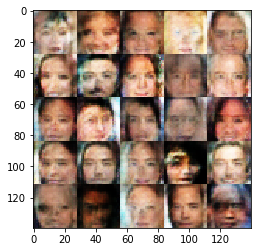

Epoch 1/1... Batch 2710... Discriminator Loss: 1.1017... Generator Loss: 0.9389
Epoch 1/1... Batch 2720... Discriminator Loss: 1.0956... Generator Loss: 0.8097
Epoch 1/1... Batch 2730... Discriminator Loss: 1.5452... Generator Loss: 0.3846
Epoch 1/1... Batch 2740... Discriminator Loss: 1.3754... Generator Loss: 0.4325
Epoch 1/1... Batch 2750... Discriminator Loss: 0.9894... Generator Loss: 0.9263
Epoch 1/1... Batch 2760... Discriminator Loss: 0.9871... Generator Loss: 0.8038
Epoch 1/1... Batch 2770... Discriminator Loss: 0.9403... Generator Loss: 1.1475
Epoch 1/1... Batch 2780... Discriminator Loss: 1.4156... Generator Loss: 0.3948
Epoch 1/1... Batch 2790... Discriminator Loss: 1.1444... Generator Loss: 0.5841
Epoch 1/1... Batch 2800... Discriminator Loss: 0.9607... Generator Loss: 0.7954


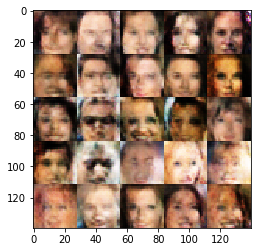

Epoch 1/1... Batch 2810... Discriminator Loss: 0.9681... Generator Loss: 1.1759
Epoch 1/1... Batch 2820... Discriminator Loss: 0.8350... Generator Loss: 0.9984
Epoch 1/1... Batch 2830... Discriminator Loss: 1.0965... Generator Loss: 0.9081
Epoch 1/1... Batch 2840... Discriminator Loss: 1.0308... Generator Loss: 0.7719
Epoch 1/1... Batch 2850... Discriminator Loss: 1.1186... Generator Loss: 1.0920
Epoch 1/1... Batch 2860... Discriminator Loss: 0.9359... Generator Loss: 1.1764
Epoch 1/1... Batch 2870... Discriminator Loss: 0.9135... Generator Loss: 1.2583
Epoch 1/1... Batch 2880... Discriminator Loss: 0.9439... Generator Loss: 0.8352
Epoch 1/1... Batch 2890... Discriminator Loss: 1.1622... Generator Loss: 1.0283
Epoch 1/1... Batch 2900... Discriminator Loss: 1.3981... Generator Loss: 0.6950


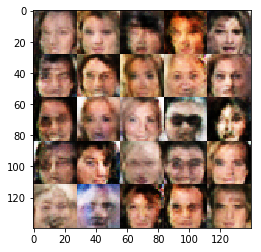

Epoch 1/1... Batch 2910... Discriminator Loss: 1.0368... Generator Loss: 0.7423
Epoch 1/1... Batch 2920... Discriminator Loss: 1.8063... Generator Loss: 2.2309
Epoch 1/1... Batch 2930... Discriminator Loss: 1.2584... Generator Loss: 0.5869
Epoch 1/1... Batch 2940... Discriminator Loss: 0.8739... Generator Loss: 1.3297
Epoch 1/1... Batch 2950... Discriminator Loss: 1.0170... Generator Loss: 1.2991
Epoch 1/1... Batch 2960... Discriminator Loss: 1.2923... Generator Loss: 0.4976
Epoch 1/1... Batch 2970... Discriminator Loss: 1.4746... Generator Loss: 0.3955
Epoch 1/1... Batch 2980... Discriminator Loss: 0.7472... Generator Loss: 1.1726
Epoch 1/1... Batch 2990... Discriminator Loss: 1.3637... Generator Loss: 1.4510
Epoch 1/1... Batch 3000... Discriminator Loss: 0.8736... Generator Loss: 1.0155


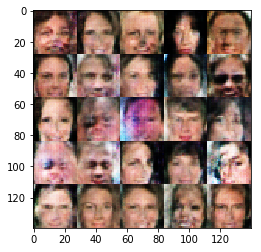

Epoch 1/1... Batch 3010... Discriminator Loss: 1.1872... Generator Loss: 0.5934
Epoch 1/1... Batch 3020... Discriminator Loss: 1.0577... Generator Loss: 0.9268
Epoch 1/1... Batch 3030... Discriminator Loss: 1.0653... Generator Loss: 1.2267
Epoch 1/1... Batch 3040... Discriminator Loss: 1.1427... Generator Loss: 0.9475
Epoch 1/1... Batch 3050... Discriminator Loss: 1.0807... Generator Loss: 0.7042
Epoch 1/1... Batch 3060... Discriminator Loss: 1.0721... Generator Loss: 0.6959
Epoch 1/1... Batch 3070... Discriminator Loss: 1.0452... Generator Loss: 0.9079
Epoch 1/1... Batch 3080... Discriminator Loss: 1.2048... Generator Loss: 1.3676
Epoch 1/1... Batch 3090... Discriminator Loss: 1.1860... Generator Loss: 1.3308
Epoch 1/1... Batch 3100... Discriminator Loss: 1.0957... Generator Loss: 0.6953


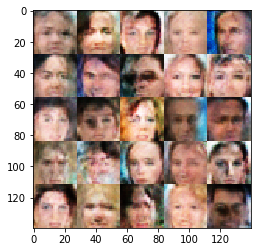

Epoch 1/1... Batch 3110... Discriminator Loss: 0.9965... Generator Loss: 1.3073
Epoch 1/1... Batch 3120... Discriminator Loss: 0.9716... Generator Loss: 1.6334
Epoch 1/1... Batch 3130... Discriminator Loss: 1.1034... Generator Loss: 0.7291
Epoch 1/1... Batch 3140... Discriminator Loss: 1.0126... Generator Loss: 0.7900
Epoch 1/1... Batch 3150... Discriminator Loss: 1.3509... Generator Loss: 0.4953
Epoch 1/1... Batch 3160... Discriminator Loss: 1.0498... Generator Loss: 0.6327


In [12]:
batch_size = 64
z_dim = 100
learning_rate = 0.002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.